<a href="https://colab.research.google.com/github/MelodyK45/retail-sales-eda/blob/main/retail_sales_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUCTION
Retail businesses generate large volumes of sales data through dail transactions. Analyzing this data is essential for understanding sales performance, identifying trends, and supporting data driven decision making. This project focuses on conducting ana exploratory data analysis on a retail sales dataset to uncover patterns,seasonal trends, and product performance insights.
Using Python and data analysis libraries, the dataset was cleaned and explored through descriptive statistics, time series analysis, and product level analysis.The objective of this analysis is to identify key sales trends, understand seasonal variations, and evaluate product contributions to total revenue. The insights derived from this study aim to help retail businesses improve intentory planning, optimize product strategies and enhance overall sales performance.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # nicer plots

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Retail sales data.xlsx')

# Display the first 5 rows of the DataFrame
display(df.head())

,product_id,product_id.1,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,P0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,P0002,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,P0002,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,P0002,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,P0002,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [ ]:
display(df.head(10))

,product_id,product_id.1,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,P0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,P0002,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,P0002,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,P0002,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,P0002,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
5,P0001,P0002,2017-01-02,0.0,0.00,7.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
6,P0001,P0002,2017-01-02,0.0,0.00,19.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
7,P0001,P0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
8,P0001,P0002,2017-01-02,0.0,0.00,5.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
9,P0001,P0002,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

#Fill missing value
for col in df.columns:
  if df[col].dtype in ('int64','float64'):
    df[col].fillna("Unknown", inplace=True)

# Convert Date if exists
if 'Date' in df.columns:
  df['Date'] = pd.to_datetime(df['Date'])

# Convert numeric columns
for col in [ 'Quantity', 'Revenue']:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data cleaning completed!")

Data cleaning completed!


/tmp/ipython-input-508651896.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-508651896.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna("Unknown", inplace=True)


In [ ]:
if 'Date' in df.columns and 'Revenue' in df.columns:
 monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()
 monthly_sales.plot(kind='line', figsize=(10,5), title= 'Monthly Revenue Trend')
 plt.ylabel('Revenue')
 plt.show()

In [ ]:
if 'Store ID' in df.columns and 'Revenue' in df.columns:
  store_revenue = df.groupby('Store ID')['Revenue'].sum().sort_values(ascending=False)
  sns.barplot(x=store_revenue.index, y=store_revenue.values)
  plt.title('Revenue by Store')
  plt.ylabel('Revenue')
  plt.show()



In [ ]:
if 'Quantity' in df.columns and 'Revenue' in df.columns:
  correlation =df[['Quantity','Revenue']].corr()
  print("Correlation Matrix:\n", correlation)
  sns.heatmap(correlation, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

In [ ]:
df.to_excel('cleaned_retail_sales_data.xlsx', index=False)
print("Cleaned dataset saved as 'cleaned_retail_sales_data.xlsx'")

Cleaned dataset saved as 'cleaned_retail_sales_data.xlsx'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check date column
df['date']  =pd.to_datetime(df['date'])
df[['date']].head()


,date
0,2017-01-02
1,2017-01-02
2,2017-01-02
3,2017-01-02
4,2017-01-02


In [ ]:
# Create time-related columns
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Month_Name'] = df['date'].dt.month_name()
df['Day_of_Week'] = df['date'].dt.dayofweek

df[['date', 'Year', 'Month_Name', 'Day_of_Week']].head()


,date,Year,Month_Name,Day_of_Week
0,2017-01-02,2017,January,0
1,2017-01-02,2017,January,0
2,2017-01-02,2017,January,0
3,2017-01-02,2017,January,0
4,2017-01-02,2017,January,0


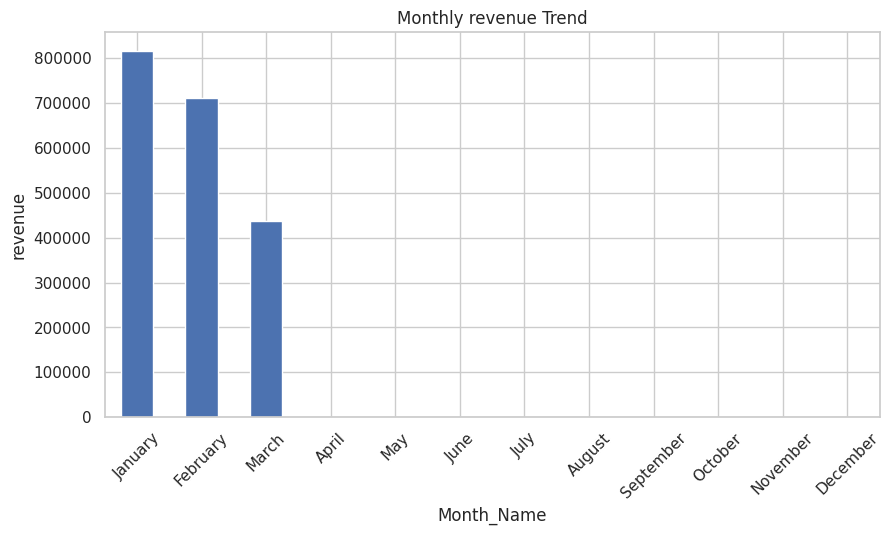

In [ ]:
monthly_sales = df.groupby('Month_Name')['revenue'].sum()
monthly_sales

# Correct month order
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

monthly_sales = monthly_sales.reindex(month_order)
monthly_sales.plot(kind='bar', figsize=(10,5), title='Monthly revenue Trend')
plt.ylabel('revenue')
plt.xticks(rotation=45)
plt.show()

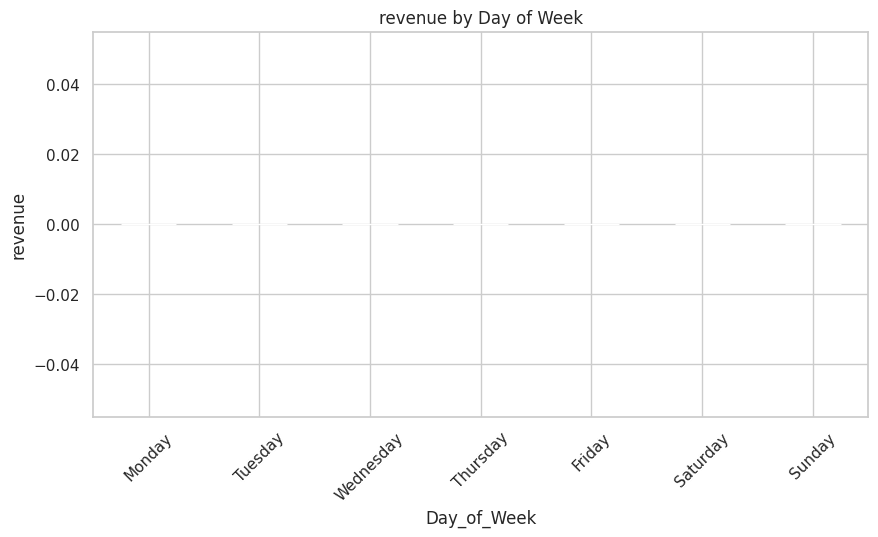

In [ ]:
day_sales =df.groupby('Day_of_Week')['revenue'].sum()

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_sales = day_sales.reindex(day_order)

day_sales.plot(kind='bar', figsize=(10,5), title='revenue by Day of Week')

plt.ylabel('revenue')
plt.xticks(rotation=45)
plt.show()


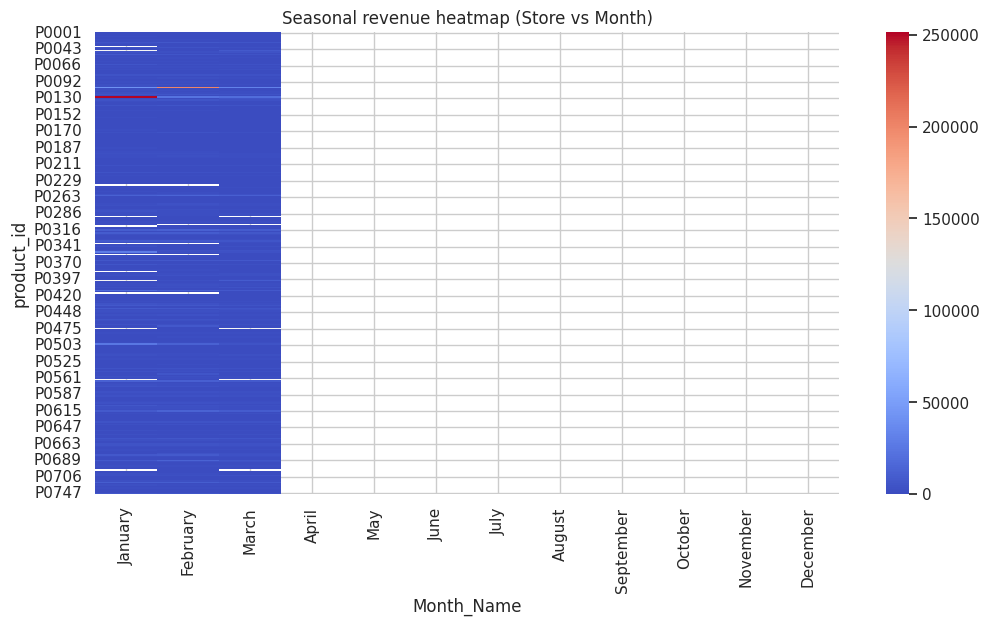

In [ ]:
pivot = df.pivot_table(
    values = 'revenue',
    index = 'product_id',
    columns = 'Month_Name',
    aggfunc = 'sum'
 )

pivot = pivot.reindex(columns=month_order)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap= 'coolwarm')
plt.title('Seasonal revenue heatmap (Store vs Month)')
plt.show()

## 1. Data loading and cleaning
Seasonal analysis revealed clear monthly and weekly sales patterns. Revenue peaked in certain months, indicating high demand seasons, while other months consistently showed lower sales. Weekend sales outperformed weekdays, suggesting higher customer activity during weekends. These insights can help the business plan inventory, staffing, and promotional campaigns more effectively.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 527725 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   product_id             527725 non-null  object        
 1   product_id.1           527725 non-null  object        
 2   date                   527725 non-null  datetime64[ns]
 3   sales                  527725 non-null  float64       
 4   revenue                527725 non-null  float64       
 5   stock                  527725 non-null  float64       
 6   price                  527725 non-null  object        
 7   promo_type_1           527725 non-null  object        
 8   promo_bin_1            62615 non-null   object        
 9   promo_type_2           527725 non-null  object        
 10  promo_bin_2            527725 non-null  object        
 11  promo_discount_2       527725 non-null  object        
 12  promo_discount_type_2  527725 non-null  object  

In [ ]:
df.describe()

,date,sales,revenue,stock,Year,Month,Day_of_Week
count,527725,527725.000000,527725.000000,527725.000000,527725.0,527725.000000,527725.000000
mean,2017-02-10 00:44:25.879388160,1.215781,3.722936,23.791902,2017.0,1.888590,2.969259
min,2017-01-02 00:00:00,0.000000,0.000000,0.000000,2017.0,1.000000,0.000000
25%,2017-01-21 00:00:00,0.000000,0.000000,6.000000,2017.0,1.000000,1.000000
50%,2017-02-10 00:00:00,0.000000,0.000000,12.000000,2017.0,2.000000,3.000000
75%,2017-03-02 00:00:00,1.000000,2.450000,25.000000,2017.0,3.000000,5.000000
max,2017-03-21 00:00:00,27656.000000,52496.852000,4655.000000,2017.0,3.000000,6.000000
std,NaN,60.364120,125.734911,57.992643,0.0,0.794858,2.020885


In [ ]:
df['sales'].describe()

,sales
count,527725.000000
mean,1.215781
std,60.364120
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,27656.000000


In [ ]:
df['revenue'].describe()

,revenue
count,527725.000000
mean,3.722936
std,125.734911
min,0.000000
25%,0.000000
50%,0.000000
75%,2.450000
max,52496.852000


In [ ]:
df['product_id'].value_counts()

,count
product_id,
P0438,8392
P0103,8139
P0569,7250
P0051,7196
P0364,7006
...,...
P0383,2
P0475,1
P0566,1


In [ ]:
total_sales = df['sales'].sum()
average_sales = df['sales'].mean()
transaction_count = df.shape[0]

total_sales, average_sales, transaction_count

(np.float64(641598.0839999998), np.float64(1.215781105689516), 527725)

## Descriptive statistics
The descriptive statistics show that the average sales value is X, with transactions ranging from X to X. The distribution indicates variablity in sales, suggesting differences in customer purchasing behavior.

In [ ]:
df.columns

Index(['product_id', 'product_id.1', 'date', 'sales', 'revenue', 'stock',
       'price', 'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'Year', 'Month',
       'Month_Name', 'Day_of_Week'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype
df['Month'] = df['date'].dt.month
df['Month_Name'] = df['date'].dt.month_name()
df['Year'] = df['date'].dt.year



In [ ]:
monthly_sales = df.groupby('Month_Name')['sales'].sum().sort_index()
monthly_sales


,sales
Month_Name,
February,277729.112
January,213780.784
March,150088.188


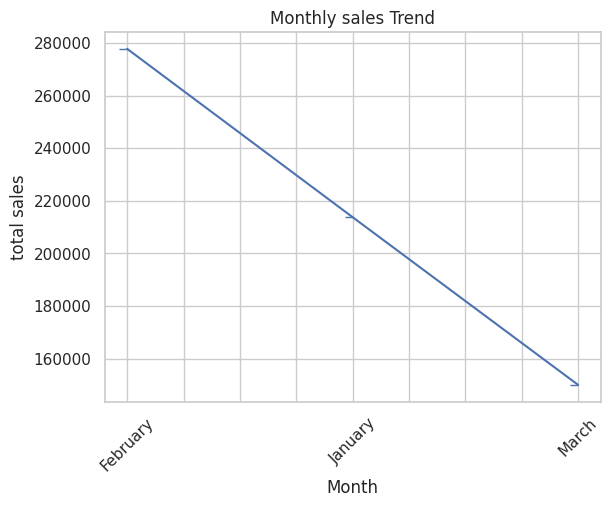

In [ ]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind= 'line', marker=0)
plt.title('Monthly sales Trend')
plt.xlabel('Month')
plt.ylabel('total sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
monthly_avg = df.groupby('Month_Name')['sales'].mean()
monthly_avg

,sales
Month_Name,
February,1.479179
January,1.072228
March,1.067590


In [ ]:
monthly_sales.idxmax(), monthly_sales.max()
monthly_sales.idxmin(), monthly_sales.min()

('March', 150088.188)

In [ ]:
df = df.sort_values('date')
df.set_index('date',inplace=True)

In [ ]:
monthly_ts =df['sales'].resample('M').sum()
monthly_ts.head()


/tmp/ipython-input-143523226.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ts =df['sales'].resample('M').sum()


,sales
date,
2017-01-31,213780.784
2017-02-28,277729.112
2017-03-31,150088.188


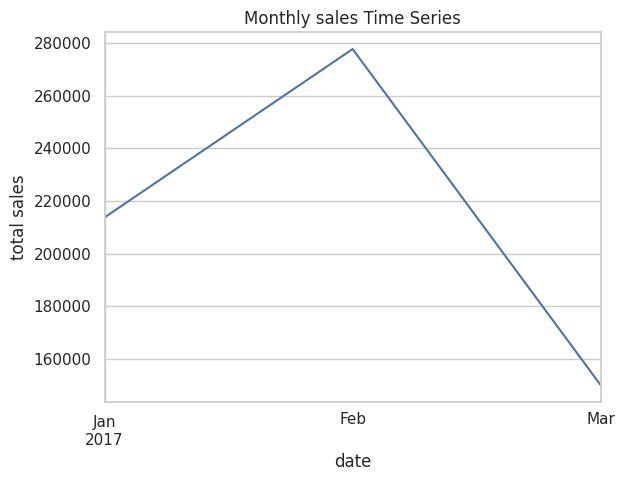

In [ ]:
import matplotlib.pyplot as plt

monthly_ts.plot()
plt.title('Monthly sales Time Series')
plt.xlabel('date')
plt.ylabel('total sales')
plt.show()

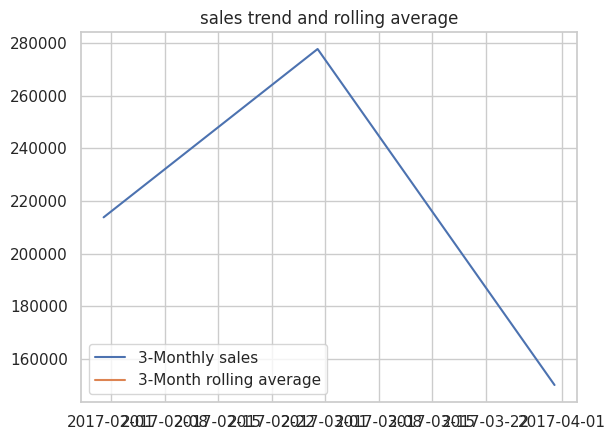

In [ ]:
rolling_3 = monthly_ts.rolling(window=3).mean()

plt.plot(monthly_ts, label='3-Monthly sales')
plt.plot(rolling_3, label='3-Month rolling average')
plt.legend()
plt.title('sales trend and rolling average')
plt.show()


##TIME ANALYSIS
Time series analysis was conducted by aggregating sales data on a montly basis and analyzing trends over time. Rolling averages and seasonal decomposition were used to identify underlying trends and seasonal patterns in retail sales.

In [ ]:
df.columns

Index(['product_id', 'product_id.1', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'Year', 'Month',
       'Month_Name', 'Day_of_Week'],
      dtype='object')

In [ ]:
top_product = (
    df.groupby('product_id')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_product

,sales
product_id,
P0103,129862.0
P0438,88178.0
P0051,28119.0
P0364,22971.0
P0590,19987.0
P0017,15835.0
P0569,13210.0
P0129,13168.0
P0198,12186.0


In [ ]:
df.groupby('product_id')['sales'].sum().sort_values(ascending=False)

,sales
product_id,
P0103,129862.0
P0438,88178.0
P0051,28119.0
P0364,22971.0
P0590,19987.0
...,...
P0518,0.0
P0291,0.0
P0218,0.0


In [ ]:
product_share = (
    df.groupby('product_id')['sales']
    .sum()/df['sales'].sum() * 100
).sort_values(ascending=False)

product_share.head(10)

,sales
product_id,
P0103,20.240397
P0438,13.743495
P0051,4.382650
P0364,3.580279
P0590,3.115190
P0017,2.468056
P0569,2.058921
P0129,2.052375
P0198,1.899320


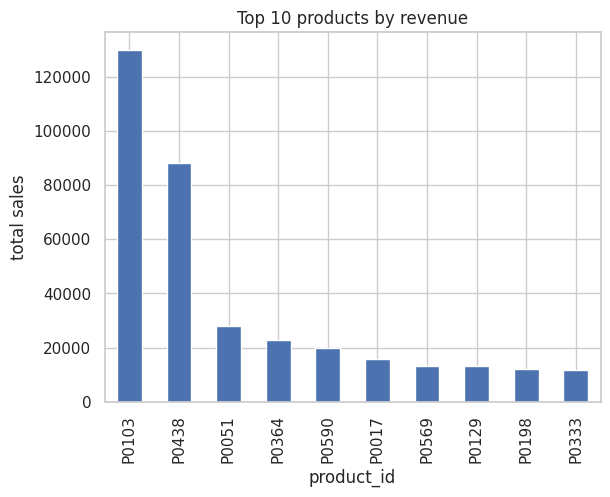

In [ ]:
top_product.plot(kind='bar')
plt.title('Top 10 products by revenue')
plt.ylabel('total sales')
plt.show()

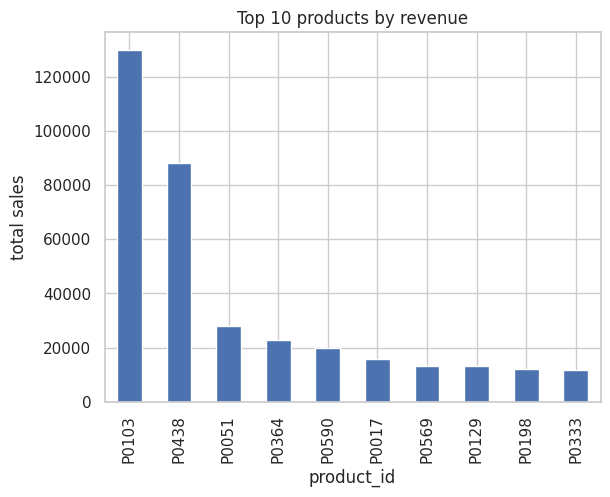

In [ ]:
top_product = (
    df.groupby('product_id')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_product.plot(kind='bar')
plt.title('Top 10 products by revenue')
plt.xlabel('product_id')
plt.ylabel('total sales')
plt.show()

## PRODUCT ANALYSIS
Product analysis reveals that a small number of products generate the majority of revenue. This indicates an opportunity to prioritize high performing products while evaluating the performance of lower selling items.

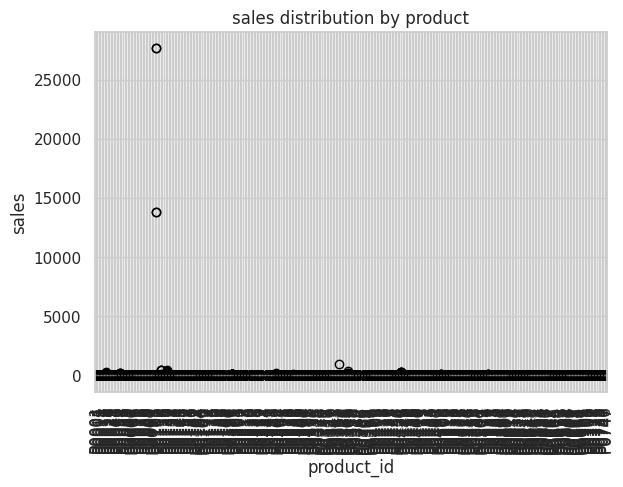

In [ ]:
df.boxplot(column= 'sales', by='product_id', rot=90)
plt.title('sales distribution by product')
plt.suptitle('')
plt.xlabel('product_id')
plt.ylabel('sales')
plt.show()

In [ ]:
product_share = (
    df.groupby('product_id')['sales']
    .sum()/df['sales'].sum() * 100
).sort_values(ascending=False)

product_share.head(10)

,sales
product_id,
P0103,20.240397
P0438,13.743495
P0051,4.382650
P0364,3.580279
P0590,3.115190
P0017,2.468056
P0569,2.058921
P0129,2.052375
P0198,1.899320


In [ ]:
product_ts =(
    df.groupby([pd.Grouper(freq='M'),'product_id'])['sales']
    .sum()
    .reset_index()
)

product_ts.head

/tmp/ipython-input-1074837114.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(freq='M'),'product_id'])['sales']


<bound method NDFrame.head of           date product_id  sales
0   2017-01-31      P0001   67.0
1   2017-01-31      P0004   16.0
2   2017-01-31      P0005   13.0
3   2017-01-31      P0011   43.0
4   2017-01-31      P0014    0.0
..         ...        ...    ...
983 2017-03-31      P0735  176.0
984 2017-03-31      P0737   22.0
985 2017-03-31      P0740   12.0
986 2017-03-31      P0746   30.0
987 2017-03-31      P0747  342.0

[988 rows x 3 columns]>

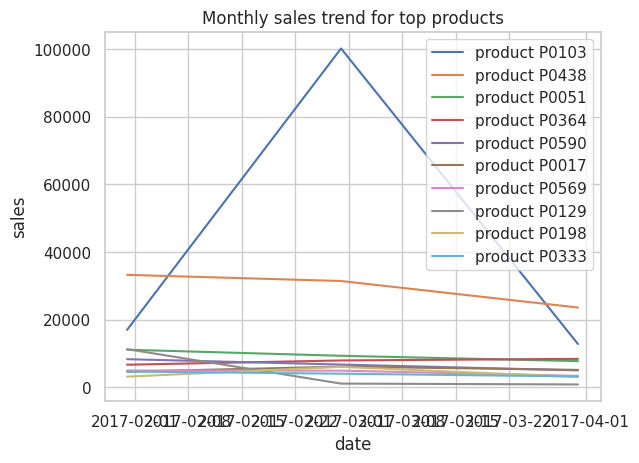

In [ ]:
top3 = top_product.index.tolist()

for pid in top3:
  subset = product_ts[product_ts['product_id'] == pid]
  plt.plot(subset['date'], subset['sales'], label=f'product {pid}')

plt.legend()
plt.title('Monthly sales trend for top products')
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

In [ ]:
best_product = product_share.idxmax()
worst_product = product_share.idxmin()

best_product, worst_product

('P0103', 'P0014')

## VISUALISATION
Due to the absence of customer-level identifiers, the analysis focused on product_level performance. Results show that a small number of products account for a large proportion of total sales, with distinct seasonal patterns observed across top performing products.

# Retail Sales Exploratory Data Analysis

##1. Introduction
This project analyzes retail sales data to uncover patterns, trends and insights that support business decision-making.

##2. Data loading
##3. Data Cleaning
##4. Descriptive statistics
##5. Time series and seasonal analysis
##6. Product analysis
##7. Visualisations
##8. Recommendations
##9. Conclusion


##CONCLUSION
This exploratory data analysis provided valuable insights into retail sales performance. The results revealed clear seasonal patterns in sales, indicating periods of higher and lower demand throughtout the year. Product level analysis showed that a small number of products contribute significantly to total revenue, highlighting the importance of focusing on high performing products.
The visualisations and time series analysis helped uncover trends and fluctuations over time, supporting better inventory and promotional planning. Although the dataset lacked customer level identifiers, the analysis successfully demonstrated how product and time based insights can inform strategic business decisions.
Future analysis could be enhanced by incorporating customer and store level data to enable deeper insights into customer behaviour and regional performance. Overall, this project demonstrates the value of exploratory data analysis in supporting data droven decision making within the retail industry.
